<h1>Selenium Advaced</h1>


- Go to goole image searche window
- Type in then name of a popular soccer player, "Son Heung-min"
- Dowonlod his photos

In [1]:
import pandas as pd
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

from webdriver_manager.chrome import ChromeDriverManager


In [2]:
driver=webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======


2022-07-09 22:00:55,543 INFO ====== WebDriver manager ======


[WDM] - Current google-chrome version is 103.0.5060


2022-07-09 22:00:55,544 INFO Current google-chrome version is 103.0.5060


[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome


2022-07-09 22:00:55,544 INFO Get LATEST chromedriver version for 103.0.5060 google-chrome


[WDM] - Driver [C:\Users\Kwang-Chul Kwon\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache


2022-07-09 22:00:55,654 INFO Driver [C:\Users\Kwang-Chul Kwon\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache


C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_20880\365059496.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(ChromeDriverManager().install())


In [3]:
driver.get('https://www.google.com/imghp?hl=en&ogbl')

In [4]:
# find the search window
elem=driver.find_element(By.NAME, 'q')

In [5]:
# type in search keyword
elem.send_keys("Son Heung-min")

In [6]:
# hit Enter key
elem.send_keys(Keys.RETURN)

In [7]:
# download the photos
# click the thumbnail photo, which leads to another photo with better resolution then we click the photo again to download
# select all the thumbnail photos
# click the first photo

driver.find_elements(By.CLASS_NAME, "rg_i.Q4LuWd")[0].click()

In [10]:
# download the clicked image

image_url=driver.find_element(By.CLASS_NAME, "n3VNCb").get_attribute('src')
print(image_url)
time.sleep(1)

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2NQbLU2rOK1HkRz1MQVI35IH3ZmRw3MNyJA&usqp=CAU


In [11]:
# download the image

import urllib.request

urllib.request.urlretrieve(image_url, '1.png')

('1.png', <http.client.HTTPMessage at 0x199f5366e50>)

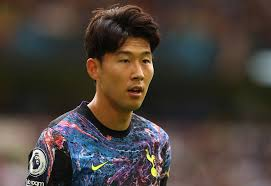

In [12]:
# display the downloaded image

from IPython.display import display, Image

listOfImageNames = ['1.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

<h3>So far, we have just downloaded only one photo. Now we are going to retrieve the remaining all the photos</h3>

In [13]:
images=driver.find_elements(By.CLASS_NAME, "rg_i.Q4LuWd")

for i in range(len(images)):
    try:
        images[i].click()
    except:
        continue
        
    try:
        image_url=driver.find_element(By.CLASS_NAME, "n3VNCb.KAlRDb").get_attribute('src')
    except:
        pass

    time.sleep(1)
    
    try:
        urllib.request.urlretrieve(image_url, f'{i}.png')
        
    except:
        pass
    
    
# count=1
# for image in images:
#     image.click()
#     try:
#         image_url=driver.find_element(By.CLASS_NAME, "n3VNCb").get_attribute('src')
#     except Exception as e:
#         print(e)

#     time.sleep(1)
#     urllib.request.urlretrieve(image_url, f'{count}.png')
    
#     count=count+1

KeyboardInterrupt: 

**If we scroll the page then more images show up so the downloading images no longer proceed without scrolling
we also have to click the button "Show more results" to get all the photos**

**Fisrt we collect all the photos by scrolling all the way down the webpages**

**Refer to the advanced_2**